In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

data = pd.read_csv('original_data.csv', sep=",", low_memory=False)

In [98]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


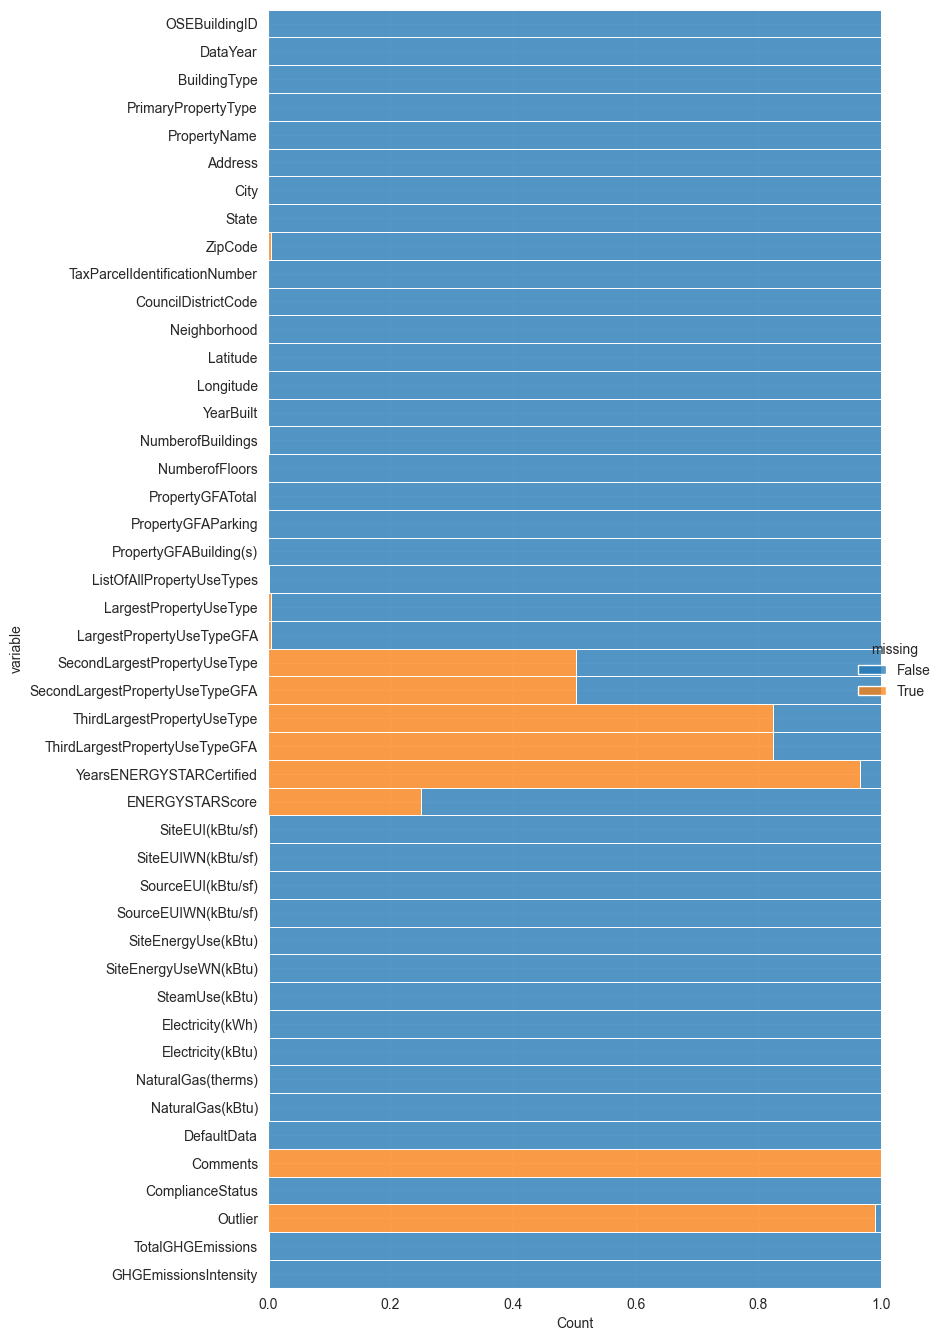

In [99]:
sns.displot(data=data.isna().melt(value_name="missing"),
            y="variable",
            hue="missing",
            multiple="fill",
            aspect=3.25,
            )
plt.gcf().set_size_inches(8, 15)

In [100]:
def percentage_nan_by_columns(df):
    s = df.isnull().sum(axis = 0) / data.shape[0] * 100.00
    s = s.transform(lambda x: '{:02.2f}'.format(x)+' %')
    return s

In [101]:
pd.options.display.max_rows = 182
percentage_nan_by_columns(data)

OSEBuildingID                        0.00 %
DataYear                             0.00 %
BuildingType                         0.00 %
PrimaryPropertyType                  0.00 %
PropertyName                         0.00 %
Address                              0.00 %
City                                 0.00 %
State                                0.00 %
ZipCode                              0.47 %
TaxParcelIdentificationNumber        0.00 %
CouncilDistrictCode                  0.00 %
Neighborhood                         0.00 %
Latitude                             0.00 %
Longitude                            0.00 %
YearBuilt                            0.00 %
NumberofBuildings                    0.24 %
NumberofFloors                       0.00 %
PropertyGFATotal                     0.00 %
PropertyGFAParking                   0.00 %
PropertyGFABuilding(s)               0.00 %
ListOfAllPropertyUseTypes            0.27 %
LargestPropertyUseType               0.59 %
LargestPropertyUseTypeGFA       

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

les types semblent être bons

In [103]:
data.loc[data['ZipCode'].isna(), 'ZipCode']  = float(98109.0)
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,98109.0,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,98109.0,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,98109.0,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,98109.0,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [104]:
data.loc[data['ENERGYSTARScore'].isna(), 'ENERGYSTARScore']  = data['ENERGYSTARScore'].median()

In [105]:
data.loc[data['SecondLargestPropertyUseType'].isna(), 'SecondLargestPropertyUseType']  = 'NoNe'
data.loc[data['ThirdLargestPropertyUseType'].isna(), 'ThirdLargestPropertyUseType']  = 'NoNe'
data.loc[data['SecondLargestPropertyUseTypeGFA'].isna(), 'SecondLargestPropertyUseTypeGFA']  = 0
data.loc[data['ThirdLargestPropertyUseTypeGFA'].isna(), 'ThirdLargestPropertyUseTypeGFA']  = 0

In [106]:
data.duplicated(subset=['TaxParcelIdentificationNumber']).value_counts()

False    3268
True      108
Name: count, dtype: int64

In [107]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,98109.0,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,98109.0,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,98109.0,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,98109.0,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [108]:
data = data.drop(columns=['Comments', 'Outlier'])

In [109]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,98109.0,1624049080,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,98109.0,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,98109.0,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,98109.0,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,22.11,1.57


In [110]:
data = data[data['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'Nonresidential WA'])]

In [111]:
data = data[data['ComplianceStatus'].eq('Compliant')]

In [112]:
data.reset_index(drop=True, inplace=True)

In [113]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,98109.0,2524039059,...,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,False,Compliant,20.33,1.11
1510,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,98109.0,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
1511,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,98109.0,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
1512,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,98109.0,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,22.11,1.57


In [114]:
data[data['NumberofFloors'] == 0].head(100)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
122,267,2016,NonResidential,Hotel,Grand Hyatt Seattle,721 Pine St,Seattle,WA,98101.0,6792120000,...,66502836.0,0.0,1.153696e+07,39364114.0,256831.625000,25683162.0,False,Compliant,1638.46,1.75
419,656,2016,NonResidential,Medical Office,Arnold Pavilion,1221 Madison Street,Seattle,WA,98104.0,8725990000,...,20764814.0,7815663.0,3.735333e+06,12744957.0,0.000000,0.0,False,Compliant,692.12,3.06
420,657,2016,NonResidential,Mixed Use Property,2200 Westlake - SEDO,2200 Westlake Ave.,Seattle,WA,98121.0,8729740000,...,40754364.0,0.0,8.626261e+06,29432803.0,99705.117190,9970512.0,False,Compliant,734.72,1.42
492,758,2016,NonResidential,Other,Pacific Place,600 Pine Street,Seattle,WA,98101.0,6600470000,...,46343304.0,0.0,1.363158e+07,46510954.0,0.000000,0.0,False,Compliant,324.25,0.34
971,23311,2016,NonResidential,Medical Office,HART First Hill LLC,1124 Columbia Street,Seattle,WA,98104.0,8590900646,...,25358122.0,13296249.0,3.521476e+06,12015275.0,0.000000,0.0,False,Compliant,1110.07,4.04
1426,40028,2016,NonResidential,Warehouse,Sandpoint #5,7561 63rd Ave NE,Seattle,WA,98115.0,0225049077,...,16139557.0,0.0,2.642108e+06,9014872.0,61918.878910,6191888.0,False,Compliant,391.70,1.02
1427,40031,2016,NonResidential,Medical Office,Sandpoint #25,6222 NE 74th St,Seattle,WA,98115.0,0225049077,...,2279632.5,0.0,5.320647e+05,1815405.0,3777.100342,377710.0,False,Compliant,32.72,1.08
1428,40034,2016,NonResidential,Small- and Mid-Sized Office,Sandpoint #29,6200 NE 74th ST,Seattle,WA,98115.0,0225049077,...,4292216.0,0.0,4.099035e+05,1398591.0,25486.185550,2548619.0,False,Compliant,145.11,6.62
1441,49705,2016,Nonresidential COS,Other,Magnuson,7400 Sand Point Way NE,Seattle,WA,98115.0,0225049062,...,20672948.0,0.0,2.743225e+06,9359884.0,91104.546880,9110455.0,False,Compliant,549.11,1.09
1476,49966,2016,NonResidential,Other,Smilow Rainier Vista Boys & Girls Club,4520 Martin Luther King Jr. Way S,Seattle,WA,98108.0,6056110050,...,2261075.5,0.0,4.020232e+05,1371703.0,7874.669922,787467.0,False,Compliant,51.39,1.28


In [115]:
data.loc[data['NumberofBuildings'] == 0 , 'NumberofBuildings']  = 1
data.loc[data['NumberofFloors'] == 0 , 'NumberofFloors']  = 1

In [116]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,98109.0,2524039059,...,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,False,Compliant,20.33,1.11
1510,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,98109.0,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
1511,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,98109.0,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
1512,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,98109.0,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,22.11,1.57


In [117]:
mask = (data['LargestPropertyUseType'] ==  'Multifamily Housing' )
data.drop(data[mask].index ,inplace=True)

In [118]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,98109.0,2524039059,...,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,False,Compliant,20.33,1.11
1510,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,98109.0,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
1511,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,98109.0,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
1512,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,98109.0,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,22.11,1.57


II. Variables à prédire :
Il existe plusieurs variables qui correspondent à la consommation et aux émissions totales d'énergie, nous choisissons de sélectionner celles qui ne sont pas normalisées (par GFA ou conditions météorologiques).

SiteEnergyUse (kBtu) : quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie, ajustée à ce que la propriété aurait consommé dans des conditions météorologiques moyennes sur 30 ans.

TotalGHGEmissions : la quantité totale d'émissions de gaz à effet de serre, y compris les gaz de dioxyde de carbone, de méthane et d'oxyde d'azote, rejetées dans l'atmosphère en raison de la consommation d'énergie de la propriété, mesurée en tonnes métriques d'équivalent dioxyde de carbone.

Les deux sont des variables quantitatives continues.

In [119]:
def drop_interquartile_outliers(column,dataFrame):
    Q3 = np.quantile(column, 0.75)
    Q1 = np.quantile(column, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    mask = (column < lower_range)  | ( column > upper_range )
    dataFrame.drop(column.loc[mask].index, inplace=True)


drop_interquartile_outliers(data['TotalGHGEmissions'],data)
drop_interquartile_outliers(data['SiteEnergyUse(kBtu)'],data)

Nous avons supprimé les valeurs aberrantes interquartiles, nous pouvons maintenant examiner de plus près les deux distributions :

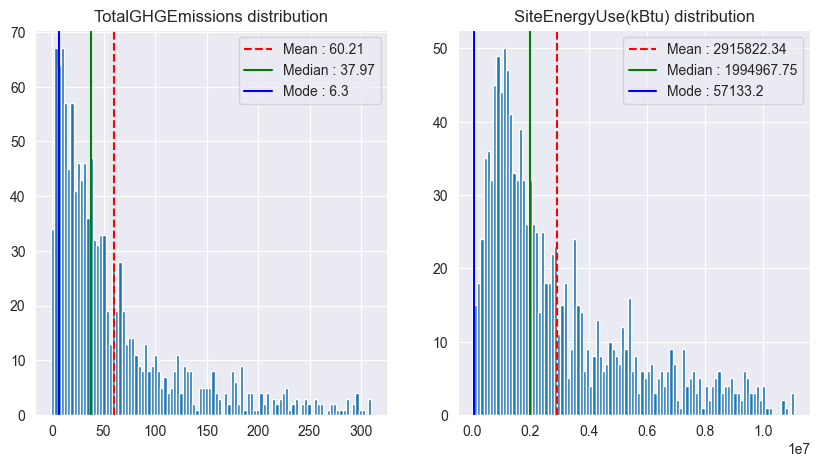

In [120]:
fig1, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# TotalGHGEmissions
ax1.hist(data['TotalGHGEmissions'], bins=100)
ax1.set_title('TotalGHGEmissions distribution')
mean    =   data['TotalGHGEmissions'].mean()
median  =   data['TotalGHGEmissions'].median()
mode    =   data['TotalGHGEmissions'].mode().values[0]
ax1.axvline(mean,   color='r', linestyle='--',label="Mean : "   +   str(round(mean,2)))
ax1.axvline(median, color='g', linestyle='-', label="Median : " +   str(round(median,2)))
ax1.axvline(mode,   color='b', linestyle='-', label="Mode : "   +   str(round(mode,2)))
ax1.legend()
# 'SiteEnergyUse(kBtu)'
ax2.hist(data['SiteEnergyUse(kBtu)'], bins=100)
ax2.set_title('SiteEnergyUse(kBtu) distribution')
mean    =   data['SiteEnergyUse(kBtu)'].mean()
median  =   data['SiteEnergyUse(kBtu)'].median()
mode    =   data['SiteEnergyUse(kBtu)'].mode().values[0]
ax2.axvline(mean,   color='r', linestyle='--',label="Mean : "   +   str(round(mean,2)))
ax2.axvline(median, color='g', linestyle='-', label="Median : " +   str(round(median,2)))
ax2.axvline(mode,   color='b', linestyle='-', label="Mode : "   +   str(round(mode,2)))

ax2.legend()

plt.show()

In [121]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))
print('TotalGHGEmissions')
print('Skewness : ' , round(data['TotalGHGEmissions'].skew(),3))
print('Kurtosis  - Normal Kurtosis : ' , round(data['TotalGHGEmissions'].kurtosis(),3))
print('Gini coefficient  : ' , round(gini(data['TotalGHGEmissions']),3))
print('\nSiteEnergyUse(kBtu)')
print('Skewness : ' , round(data['SiteEnergyUse(kBtu)'].skew(),3))
print('Kurtosis - Normal Kurtosis : ' , round(data['SiteEnergyUse(kBtu)'].kurtosis(),3))
print('Gini coefficient : ' , round(gini(data['SiteEnergyUse(kBtu)']),3))

TotalGHGEmissions
Skewness :  1.756
Kurtosis  - Normal Kurtosis :  2.749
Gini coefficient  :  0.526

SiteEnergyUse(kBtu)
Skewness :  1.236
Kurtosis - Normal Kurtosis :  0.704
Gini coefficient :  0.449


Les deux distributions ne sont pas symétriques et asymétriques vers la droite. Ceci est confirmé par les coefficients d'asymétrie supérieurs à 0 et les coefficients de Gini qui indiquent une distribution inégale.

De plus, la moyenne est supérieure à la médiane pour les deux variables.

Cela indique que certains bâtiments ont des émissions et une consommation très élevées et que la plupart d'entre eux doivent être concentrés à droite de la valeur médiane.

Les deux distributions sont leptokurtiques avec une courbe de pics plus élevée que la distribution normale (coefficient d'aplatissement).

Regardons de plus près la relation entre les deux, en distinguant la principale source d'énergie :

C:\Program Files\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Program Files\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


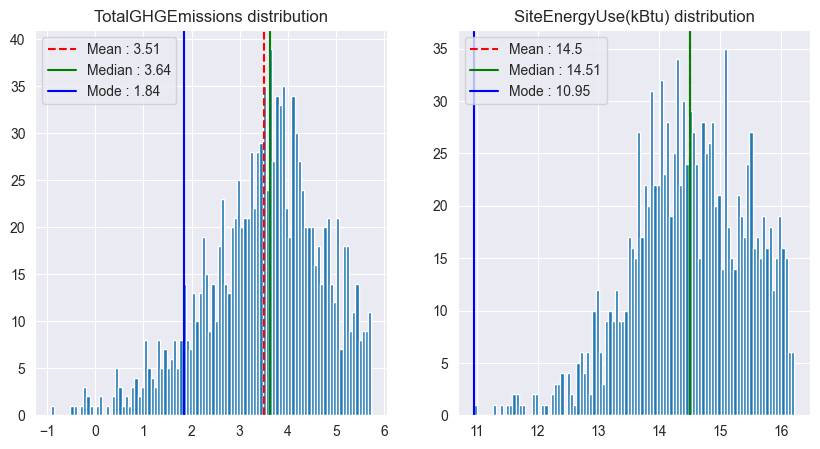

In [122]:
fig2, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# TotalGHGEmissions
ax1.hist(np.log(data['TotalGHGEmissions']), bins=100)
ax1.set_title('TotalGHGEmissions distribution')
mean    =   np.log(data['TotalGHGEmissions']).mean()
median  =   np.log(data['TotalGHGEmissions']).median()
mode    =   np.log(data['TotalGHGEmissions']).mode().values[0]
ax1.axvline(mean,   color='r', linestyle='--',label="Mean : "   +   str(round(mean,2)))
ax1.axvline(median, color='g', linestyle='-', label="Median : " +   str(round(median,2)))
ax1.axvline(mode,   color='b', linestyle='-', label="Mode : "   +   str(round(mode,2)))
ax1.legend()
# 'SiteEnergyUse(kBtu)'
ax2.hist(np.log(data['SiteEnergyUse(kBtu)']), bins=100)
ax2.set_title('SiteEnergyUse(kBtu) distribution')
mean    =   np.log(data['SiteEnergyUse(kBtu)']).mean()
median  =   np.log(data['SiteEnergyUse(kBtu)']).median()
mode    =   np.log(data['SiteEnergyUse(kBtu)']).mode().values[0]
ax2.axvline(mean,   color='r', linestyle='--',label="Mean : "   +   str(round(mean,2)))
ax2.axvline(median, color='g', linestyle='-', label="Median : " +   str(round(median,2)))
ax2.axvline(mode,   color='b', linestyle='-', label="Mode : "   +   str(round(mode,2)))

ax2.legend()

plt.show()

Année de construction

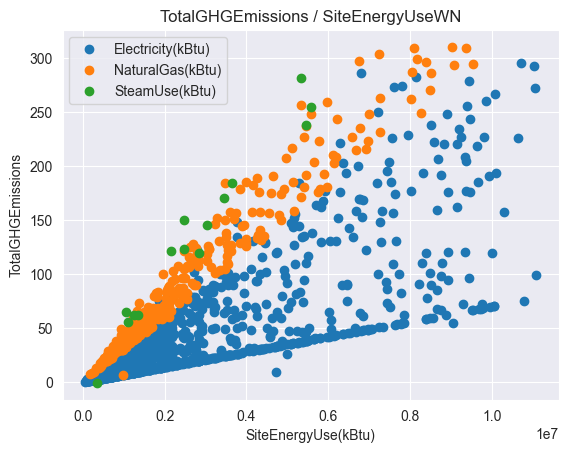

In [123]:
data['HighestEnergyProvider'] = data[['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']].idxmax(axis=1)
groups = data.groupby('HighestEnergyProvider')
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['SiteEnergyUse(kBtu)'], group['TotalGHGEmissions'], marker='o', linestyle='', label=name)
ax.set_xlabel('SiteEnergyUse(kBtu)')
ax.set_ylabel('TotalGHGEmissions')
ax.set_title('TotalGHGEmissions / SiteEnergyUseWN' )
ax.legend()
plt.show()
data.drop('HighestEnergyProvider',axis=1,inplace=True)

Les émissions de GES ont une limite supérieure et inférieure en fonction de SiteEnergyUse.

Cela peut s'expliquer par le fait que les émissions dépendent de la source d'énergie (gaz, électricité, charbon...). La source avec la plus forte émission de carbone est la vapeur ; c'est la limite la plus élevée et il en va de même pour la limite la plus basse avec l'électricité.

Les valeurs avec SiteEnergyUse égales à 0 sont clairement des valeurs aberrantes.

Pour corriger les valeurs aberrantes nous prendrons en compte uniquement ces trois sources (vapeur, électricité et gaz naturel) et remplacerons la valeur 0 par la somme de ces trois variables.

In [124]:
data['SUM_ENERGYUse(kBtu)'] = data[['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']].sum(axis=1)
data.loc[data['SiteEnergyUse(kBtu)'] == 0 , 'SiteEnergyUse(kBtu)']  = data['SUM_ENERGYUse(kBtu)']
data.drop( 'SUM_ENERGYUse(kBtu)',axis=1,inplace=True)

In [125]:
st.pearsonr(data['TotalGHGEmissions'],data['SiteEnergyUse(kBtu)'])[0]

0.7241375407334848

Il existe une nette corrélation positive entre les deux avec un coefficient de Pearson de 0,724.

Douglas a dit : « Nous ferons de toute façon pour tout nouveau bâtiment un premier relevé de référence la première année, donc rien ne t'interdit d'en déduire des variables structurelles aux bâtiments, par exemple la nature et proportions des sources d'énergie utilisées. ". Cela signifie que nous devrions savoir si un certain bâtiment utilise de la vapeur, de l'électricité ou du gaz comme source d'énergie. Générons ces nouvelles variables :

In [126]:
data['SteamUsed']          = False
data['ElectricityUsed']    = False
data['NaturalGasUsed']     = False

data.loc[data['SteamUse(kBtu)'] > 0 , 'SteamUsed']            = True
data.loc[data['Electricity(kBtu)'] > 0 , 'ElectricityUsed']   = True
data.loc[data['NaturalGas(kBtu)'] > 0  , 'NaturalGasUsed'  ]   = True

III. Location and property type impact
The impact of Neighborhood

In [127]:
data['Neighborhood'] = data['Neighborhood'].str.upper()

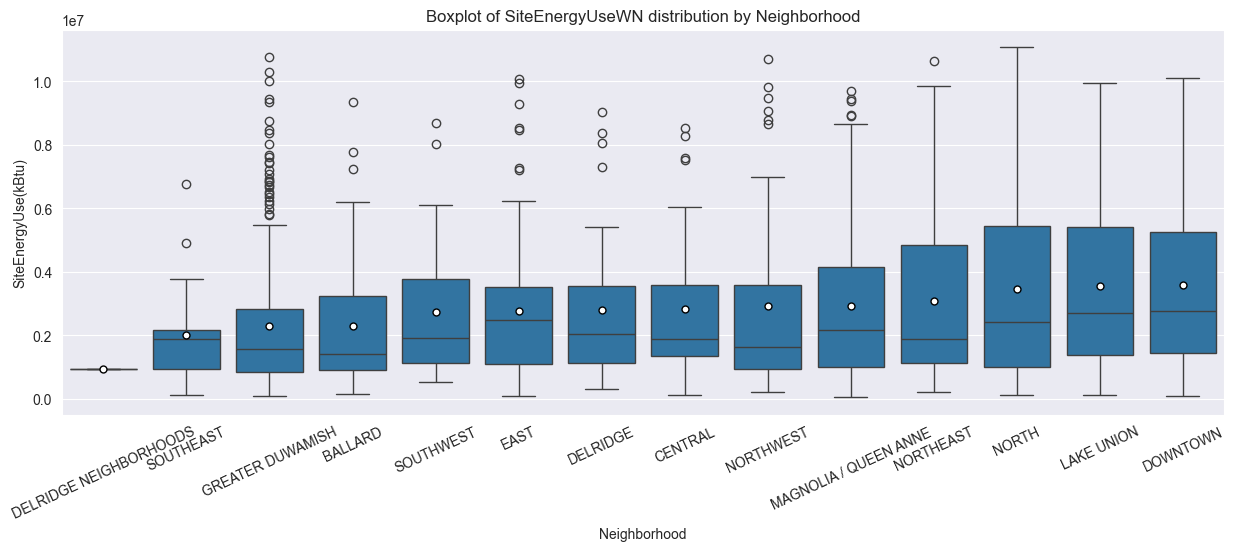

In [128]:
data['Neighborhood']
plt.figure(figsize=(15, 5))
my_order = data.groupby('Neighborhood')['SiteEnergyUse(kBtu)'].mean().sort_values().index
sns.boxplot(data=data, y='SiteEnergyUse(kBtu)', x='Neighborhood',\
                order = my_order,
                showmeans=True,
                meanprops={"marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"5"})
plt.xticks(rotation = 25) # Rotates X-Axis Ticks by 45-degrees
plt.title("Boxplot of SiteEnergyUseWN distribution by Neighborhood")
plt.show()

D'après le boxplot, il semble que les bâtiments de Lake Union et EAST aient une consommation d'énergie plus élevée et que BALLARD et Greater Duwamish une consommation d'énergie plus faible.

Pour comparer les différents groupes et vérifier notre hypothèse, nous devons poursuivre avec un test statistique.

Regardons la variance entre chaque groupe via un test de Levene (l'hypothèse nulle est que tous les groupes ont la même variance)

Pour ce test, les données doivent être indépendantes entre les groupes, c'est le cas ici car la consommation énergétique d'un bâtiment n'a pas d'impact sur la consommation d'un autre bâtiment.

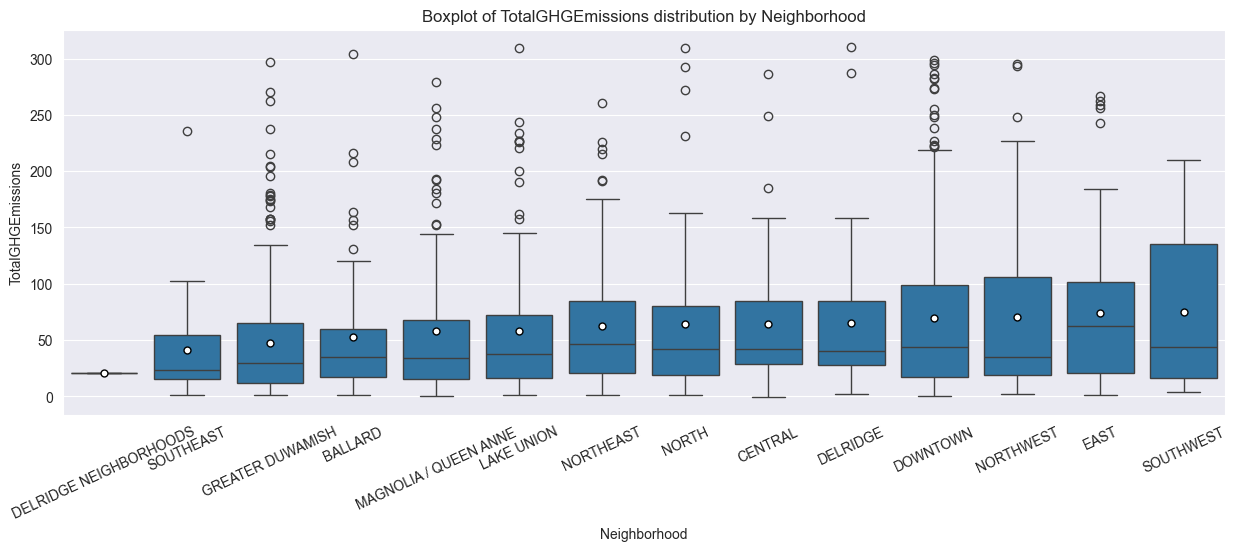

In [129]:
data['Neighborhood']
plt.figure(figsize=(15, 5))
my_order = data.groupby('Neighborhood')['TotalGHGEmissions'].mean().sort_values().index
sns.boxplot(data=data, y='TotalGHGEmissions', x='Neighborhood',\
                order = my_order,
                showmeans=True,
                meanprops={"marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"5"})
plt.xticks(rotation = 25) # Rotates X-Axis Ticks by 45-degrees
plt.title("Boxplot of TotalGHGEmissions distribution by Neighborhood")
plt.show()

In [130]:
from scipy import stats

neighborhoods = data['Neighborhood'].unique()
GROUPS = []
columns = []
alpha= 0.05
for area in neighborhoods :
    GROUPS.append(data[data['Neighborhood']== area ]['SiteEnergyUse(kBtu)'])
    columns.append(area)
pvalue = stats.levene(*GROUPS)[1]
if pvalue < alpha:
    print('On accepte H1 donc les variances sur chaque groupes sont différentes')
else:
    print('On accepte H0 donc les variances sont sur chaque groupes similaires')

On accepte H1 donc les variances sur chaque groupes sont différentes


On ne peut pas faire d'ANOVA donc on part sur un test de kruskal wallis

In [131]:
alpha = 0.05
pvalue = stats.kruskal(*GROUPS)[1]

if pvalue < alpha:
    print('On accepte H1 donc la consomation est différentes suivant les différents quartiers')
else:
    print("On accepte H0 donc la consomation n'est pas différentes suivant les différents quartiers")

On accepte H1 donc la consomation est différentes suivant les différents quartiers


On accepte H1 donc la consomation est différentes suivant les différents quartiers

In [132]:
from scipy import stats

neighborhoods = data['Neighborhood'].unique()
GROUPS = []
columns = []
alpha= 0.05
for area in neighborhoods :
    GROUPS.append(data[data['Neighborhood']== area ]['TotalGHGEmissions'])
    columns.append(area)
pvalue = stats.levene(*GROUPS)[1]
if pvalue < alpha:
    print('On accepte H1 donc les variances sur chaque groupes sont différentes')
else:
    print('On accepte H0 donc les variances sont sur chaque groupes similaires')

On accepte H1 donc les variances sur chaque groupes sont différentes


On ne peut pas faire d'ANOVA donc on part sur un test de kruskal wallis

In [133]:
alpha = 0.05
pvalue = stats.kruskal(*GROUPS)[1]

if pvalue < alpha:
    print("On accepte H1 donc l'émission est différentes suivant les différents quartiers")
else:
    print("On accepte H0 donc l'émission n'est pas différentes suivant les différents quartiers")

On accepte H1 donc l'émission est différentes suivant les différents quartiers


IV. Variables selection and data preparation
The LargestPropertyUseType is a categorical variable, but for further study we want to include it to the model.

In [134]:
data.drop(columns=['PropertyName','Address','SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity',
       'City', 'State','SiteEUIWN(kBtu/sf)','Electricity(kWh)','SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)','NaturalGas(therms)','ListOfAllPropertyUseTypes','YearsENERGYSTARCertified', 'SiteEnergyUseWN(kBtu)','SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'ComplianceStatus', 'DefaultData'],inplace=True)

In [135]:
data['TaxParcelIdentificationNumber'] = data['TaxParcelIdentificationNumber'].str.replace('-', '')

In [136]:
data = data.dropna(subset=['LargestPropertyUseType', 'LargestPropertyUseTypeGFA'])

<Axes: >

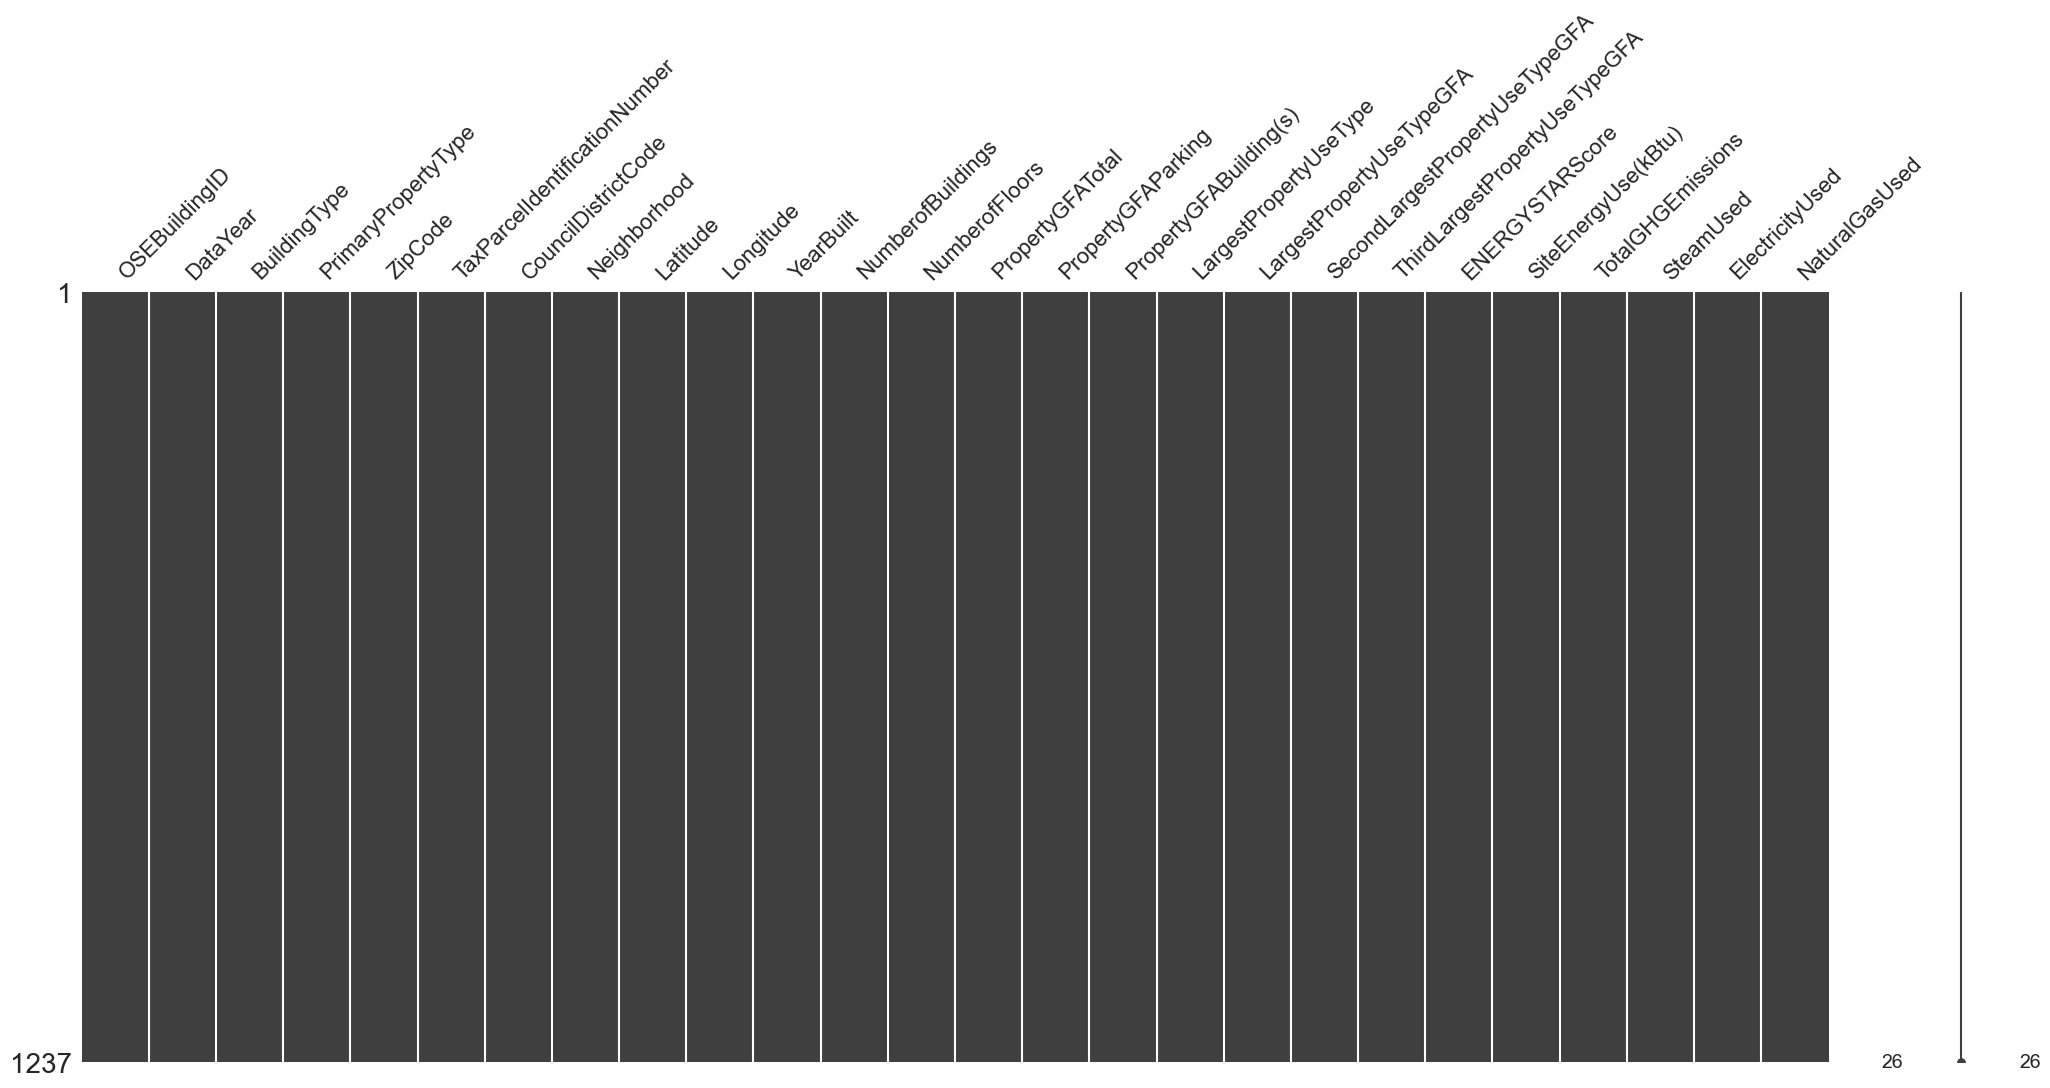

In [137]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

In [138]:
data = data[data['TaxParcelIdentificationNumber'] != '6850700316 and 6850700315']
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUsed,ElectricityUsed,NaturalGasUsed
0,1,2016,NonResidential,Hotel,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,...,Hotel,88434.0,0.0,0.0,60.0,7.226362e+06,249.98,True,True,True
1,2,2016,NonResidential,Hotel,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,...,Hotel,83880.0,15064.0,4622.0,61.0,8.387933e+06,295.86,False,True,True
3,5,2016,NonResidential,Hotel,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,...,Hotel,61320.0,0.0,0.0,56.0,6.794584e+06,286.43,True,True,True
6,10,2016,NonResidential,Hotel,98101.0,0660000825,7,DOWNTOWN,47.61390,-122.33283,...,Hotel,81352.0,0.0,0.0,27.0,5.758795e+06,176.14,False,True,True
7,11,2016,NonResidential,Other,98101.0,0660000955,7,DOWNTOWN,47.61327,-122.33136,...,Other - Entertainment/Public Assembly,102761.0,0.0,0.0,75.0,6.298132e+06,221.51,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,50221,2016,Nonresidential COS,Other,98109.0,2524039059,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,...,Other - Recreation,18261.0,0.0,0.0,75.0,9.320821e+05,20.33,False,True,True
1510,50223,2016,Nonresidential COS,Other,98109.0,3558300000,2,DOWNTOWN,47.59625,-122.32283,...,Other - Recreation,16000.0,0.0,0.0,75.0,9.502762e+05,32.17,False,True,True
1511,50224,2016,Nonresidential COS,Other,98109.0,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,...,Other - Recreation,7583.0,5574.0,0.0,75.0,5.765898e+06,223.54,False,True,True
1512,50225,2016,Nonresidential COS,Mixed Use Property,98109.0,7883603155,1,GREATER DUWAMISH,47.52832,-122.32431,...,Other - Recreation,6601.0,6501.0,484.0,75.0,7.194712e+05,22.11,False,True,True


In [139]:
data['TaxParcelIdentificationNumber'] = data['TaxParcelIdentificationNumber'].astype(float)

In [140]:
data.to_parquet('prediction.parquet')

In [141]:
data['TotalGHGEmissions'] = np.log(data['TotalGHGEmissions'])

C:\Program Files\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [142]:
data.to_parquet('prediction_log.parquet')